In [158]:
import numpy as np
import pandas as pd
from pandas import DataFrame, read_csv

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [159]:
df = pd.read_excel(r'data/elect.xls')

In [160]:
# print(df.head(0))
df


,State/Union Territory,Townstotal,Townselectrified,Townspercentage,Villagestotal,Villageselectrified,Villages percentage
0,Andhra Pradesh,210,210,100,26613,26613,100.0
1,Arunachal Pradesh,17,17,100,3863,2195,56.8
2,Assam,125,125,100,25124,20297,80.8
3,Bihar,130,130,100,39015,23914,61.3
4,Chattishgarh,97,97,100,19744,19129,96.9
5,Goa,44,44,100,347,347,100.0
6,Gujarat,242,242,100,18066,18015,99.7
7,Haryana,106,106,100,6764,6764,100.0
8,Himachal Pradesh,57,57,100,17495,17183,98.2
9,Jammu & Kashmir,75,75,100,6417,6304,98.2


In [161]:
dumy = ['State/Union Territory', 'Townstotal', 'Townselectrified', 'Townspercentage', 'Villagestotal', 'Villageselectrified','Villages percentage']
xtowntot = []
xtownele = []
xtownp   = []
xvilltot = []
xvillele = []
xvillp   = []
xstates  = []

data_box = []
for i in range(35):
    if (df[dumy[0]][i].split()[0]!="Total"):
        xtowntot.append(df[dumy[1]][i])
        xtownele.append(df[dumy[2]][i])
        xtownp.append(df[dumy[3]][i])
        xvilltot.append(df[dumy[4]][i])
        xvillele.append(df[dumy[5]][i])
        xvillp.append(df[dumy[6]][i])
    
xtowntot = np.array(xtowntot)
xtownele = np.array(xtownele)
xvilltot = np.array(xvilltot)
xvillele = np.array(xvillele)
xtownp   = np.array(xtownp)
xvillp   = np.array(xvillp)

In [162]:
combined = np.vstack((xtowntot, xtownele, xtownp, xvilltot, xvillele, xvillp)).T

In [163]:
cols=['Townstotal', 'Townselectrified', 'Townspercentage', 'Villagestotal', 'Villageselectrified', 'Villages percentage']
cols1=['Townstotal', 'Townselectrified', 'Villagestotal', 'Villageselectrified']

In [164]:
row = df[:][0:35]
for col in df.columns: 
    if (col != "State/Union Territory"):
        array = row[cols].to_numpy()
cols


['Townstotal',
 'Townselectrified',
 'Townspercentage',
 'Villagestotal',
 'Villageselectrified',
 'Villages percentage']

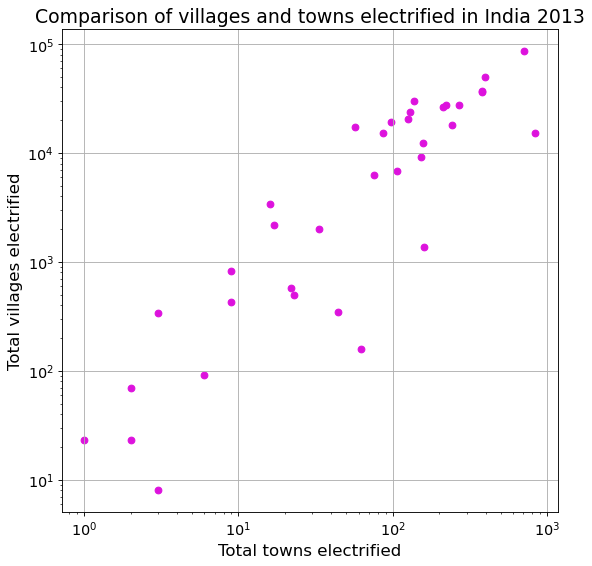

In [165]:
figure(num=None, figsize=(8, 8), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(xtownele,xvillele,color='#dd12dd',label="State/UT")
plt.yscale("log")
plt.xscale("log")
plt.xlabel('Total towns electrified')
plt.ylabel('Total villages electrified')
plt.title('Comparison of villages and towns electrified in India 2013')
plt.grid()
plt.minorticks_on()
plt.savefig('plots/scatterPlot.png',dpi=300,bbox_inches='tight')
plt.show()

<ipython-input-166-f2e3eefd8b44>:14: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(X, Y, color='gr', label='Total Towns')
<ipython-input-166-f2e3eefd8b44>:30: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.bar(X, Y, color='gr', label='Total Villages')


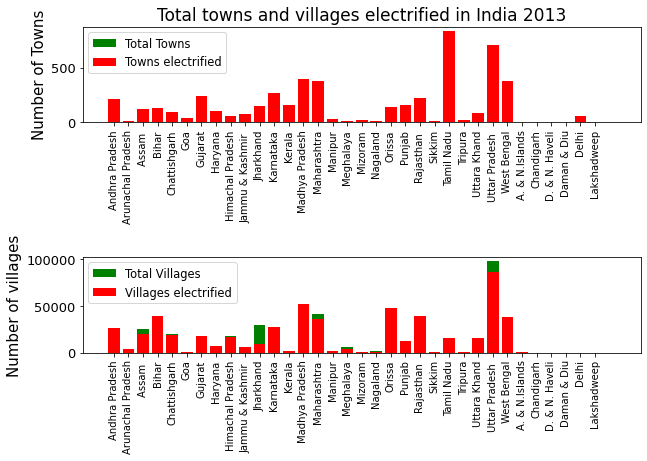

In [166]:
# ax = df.plot.bar(y='Villages percentage', x='State/Union Territory', rot=0)
plt.rcParams.update({'lines.linewidth':1})
fig, axes =plt.subplots(figsize=(10,6))
plt.rcParams.update({'font.size': 10})
plt.subplot(3,1,1)
states = np.array(df.iloc[:,0][:-1])
n = states.shape[0]
width = 0.35
index = np.arange(n)    

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])
Y1 = list(df.iloc[:, 2])
plt.bar(X, Y, color='gr', label='Total Towns')
plt.bar(X, Y1, color='r', label='Towns electrified')
plt.xticks(index,states,rotation=90,fontsize=10)
plt.title("Total towns and villages electrified in India 2013")
plt.legend()
# plt.xlabel("Years",rotation=90,fontsize=10)
plt.ylabel("Number of Towns")
plt.subplot(3,1,3)
states = np.array(df.iloc[:,0][:-1])
n = states.shape[0]
width = 0.35
index = np.arange(n)    

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 4])
Y1 = list(df.iloc[:, 5])
plt.bar(X, Y, color='gr', label='Total Villages')
plt.bar(X, Y1, color='r', label='Villages electrified')
plt.xticks(index,states,rotation=90,fontsize=10)
# plt.title("Students over 11 Years")
# plt.xlabel("Years",rotation=90,fontsize=10)
plt.ylabel("Number of villages")
plt.legend()
plt.savefig('barplot.jpg')
# Show the plot
plt.show()

In [167]:
df.columns

Index(['State/Union Territory', 'Townstotal', 'Townselectrified',
       'Townspercentage', 'Villagestotal', 'Villageselectrified',
       'Villages percentage'],
      dtype='object')

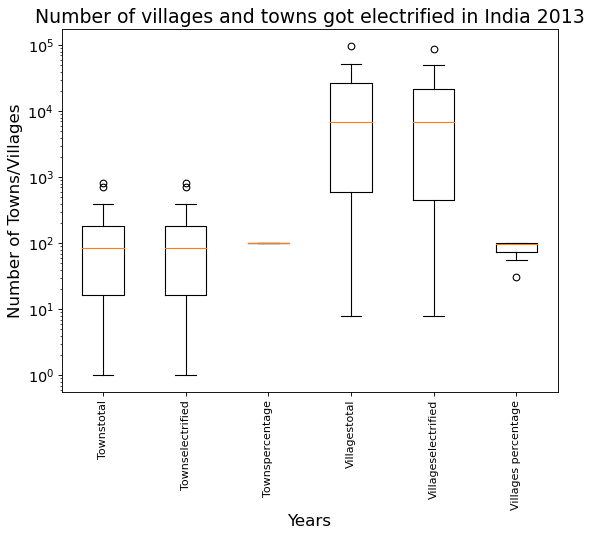

In [168]:
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
plt.boxplot(combined)
plt.yscale("log")
plt.xticks([1, 2, 3, 4, 5, 6], cols,rotation=90,fontsize=10)
plt.xlabel('Years')
plt.ylabel('Number of Towns/Villages')
plt.title("Number of villages and towns got electrified in India 2013")
plt.savefig('plots/boxplot_log.png',dpi=300,bbox_inches='tight')
plt.show()